In [1]:
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [2]:
real = pd.read_csv('/Users/kshitijaupasham/Desktop/Fake_And_Real_News/True.csv')
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
fake = pd.read_csv('/Users/kshitijaupasham/Desktop/Fake_And_Real_News/Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
real['target'] = 1
fake['target'] = 0
df = pd.concat([real,fake])
df['title'] = df['title'] +' '+df['text']
df.drop(['text','subject','date'],axis=1,inplace=True)
df.head()

,title,target
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [5]:
df['target'].value_counts()

0    23481
1    21417
Name: target, dtype: int64

In [6]:
text=[]
for i in range(len(df)):
    sample=re.sub('[^a-zA-Z]',' ',df['title'].iloc[i])
    sample=sample.lower()
    sample=sample.split()
    sample=' '.join(sample)
    text.append(sample)
text[:20]

['as u s budget fight looms republicans flip their fiscal script washington reuters the head of a conservative republican faction in the u s congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a fiscal conservative on sunday and urged budget restraint in in keeping with a sharp pivot under way among republicans u s representative mark meadows speaking on cbs face the nation drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases for non defense discretionary spendin

In [7]:
cv = CountVectorizer(max_features=80000,ngram_range=(1,2))
X = cv.fit_transform(text).toarray()
y=df['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
clf = MultinomialNB(alpha=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy=metrics.accuracy_score(y_test,y_pred)
f_score=metrics.f1_score(y_test, y_pred)
print('accuracy: ',accuracy)
print('f1 score: ',f_score)

accuracy:  0.9706013363028954
f1 score:  0.9694090382387022


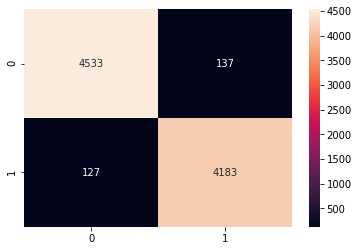

In [10]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d');